In [ ]:
#importing libraries
#Importing CSV file 'sales_data_sample.csv'
import pandas as pd
import re
df = pd.read_csv('/content/drive/MyDrive/sales_data_sample.csv', encoding='latin1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [ ]:
#Detecting NUlls
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
#dropping columns that have NULLs or incomplete data that cannot be obtained
df = df.drop(['ADDRESSLINE2','STATE','POSTALCODE','TERRITORY'], axis = 1)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,France,Roulet,Annette,Small


In [ ]:
#transforming orderdate to datetime data type
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%m/%d/%Y %H:%M', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [ ]:
#Cleaning phone number
def clean_phone_number(phone):

    phone = re.sub(r'[^\d+]', '', phone)


    if not phone.startswith('+'):
        phone = '+' + phone


    if len(phone) > 6:
        country_code = phone[:2]
        area_code = phone[2:5]
        number = phone[5:]
        formatted_phone = f'{country_code} ({area_code}) {number[:3]}-{number[3:]}'
        return formatted_phone

    return phone

df['PHONE'] = df['PHONE'].apply(clean_phone_number)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,+2 (125) 557-818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,+2 (647) 155-5,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+3 (314) 662-7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,+6 (265) 557-265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,+6 (505) 551-386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,54,S72_3212,Euro Shopping Channel,+9 (155) 594-44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,54,S72_3212,"Oulu Toy Supplies, Inc.",+9 (814) 436-55,Torikatu 38,Oulu,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,54,S72_3212,Euro Shopping Channel,+9 (155) 594-44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,54,S72_3212,Alpha Cognac,+6 (177) 655-5,1 rue Alsace-Lorraine,Toulouse,France,Roulet,Annette,Small


In [ ]:
#Cutomer segmentation based on purchase frequency
#creating pivot table
Customer_segmentation = pd.pivot_table ( df,
                        index = ['CUSTOMERNAME'],

                       values = ['ORDERNUMBER','SALES'],

                          aggfunc= {'ORDERNUMBER':'count','SALES':'sum'}

)
Customer_segmentation.rename(columns={'ORDERNUMBER': 'Count of Orders', 'SALES': 'total Sales'}, inplace=True)
def categorize_customer(row):
    if row['Count of Orders'] >= 30 or row['total Sales'] >= 50000:
        return 'High Value'
    elif row['Count of Orders'] >= 15 or row['total Sales'] >= 25000:
        return 'Mid Value'
    else:
        return 'Low Value'
Customer_segmentation['Customer Value'] = Customer_segmentation.apply(categorize_customer, axis=1)
Customer_segmentation

,Count of Orders,total Sales,Customer Value
CUSTOMERNAME,,,
"AV Stores, Co.",51,157807.81,High Value
Alpha Cognac,20,70488.44,High Value
Amica Models & Co.,26,94117.26,High Value
"Anna's Decorations, Ltd",46,153996.13,High Value
Atelier graphique,7,24179.96,Low Value
...,...,...,...
"Vida Sport, Ltd",31,117713.56,High Value
Vitachrome Inc.,25,88041.26,High Value
"Volvo Model Replicas, Co",19,75754.88,High Value


In [ ]:
#Exporting pivot table for visualization on powerBI
Customer_segmentation.to_excel('pivot.xlsx', index= 'false')
from google.colab import files
files.download('pivot.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#solving error of duplicate CLTV col
df = df.drop(columns=['CLTV'])

In [ ]:
# Average CLTV per country

customer_sales = df.groupby('CUSTOMERNAME').agg({'SALES': 'sum'}).reset_index()
customer_counts = df.groupby('CUSTOMERNAME').agg({'ORDERNUMBER': 'count'}).reset_index()
customer_data = pd.merge(customer_sales, customer_counts, on='CUSTOMERNAME')

## Calculate CLTV per customer
customer_data['CLTV'] = customer_data['SALES'] / customer_data['ORDERNUMBER']

## Merge the CLTV data back into the original dataframe to include country information
df = pd.merge(df, customer_data[['CUSTOMERNAME', 'CLTV']], on='CUSTOMERNAME', how='left')

## Group by country and calculate the average CLTV per country
cltv_by_country = df.groupby('COUNTRY').agg({'CLTV': 'mean'}).reset_index()

## Rename the column to indicate it's the average CLTV
cltv_by_country.rename(columns={'CLTV': 'Average CLTV'}, inplace=True)

#df = df.drop(columns=['CLTV_y','CLTV_x'])
cltv_by_country

,COUNTRY,Average CLTV
0,Australia,3408.773514
1,Austria,3673.864182
2,Belgium,3285.230909
3,Canada,3201.122286
4,Denmark,3899.002381
5,Finland,3582.412065
6,France,3537.950701
7,Germany,3556.001452
8,Ireland,3609.776875
9,Italy,3315.701858


In [ ]:
#Dropping duplicate columns
#df = df.drop(columns=['CLTV_y','CLTV_x'])
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,+2 (125) 557-818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,+2 (647) 155-5,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+3 (314) 662-7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,+6 (265) 557-265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,+6 (505) 551-386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,54,S72_3212,Euro Shopping Channel,+9 (155) 594-44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,54,S72_3212,"Oulu Toy Supplies, Inc.",+9 (814) 436-55,Torikatu 38,Oulu,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,54,S72_3212,Euro Shopping Channel,+9 (155) 594-44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,54,S72_3212,Alpha Cognac,+6 (177) 655-5,1 rue Alsace-Lorraine,Toulouse,France,Roulet,Annette,Small


In [ ]:
#Analyze trends over time
yearly_trend = pd.pivot_table ( df,
                        index = ['CUSTOMERNAME'],
                        columns = ['YEAR_ID'],
                        values = ['ORDERNUMBER','SALES'] ,
                          aggfunc= {'SALES':'sum'}
)
yearly_trend

SALES                     
YEAR_ID                          2003       2004      2005
CUSTOMERNAME                                              
AV Stores, Co.               51017.92  106789.89       NaN
Alpha Cognac                 55349.32        NaN  15139.12
Amica Models & Co.                NaN   94117.26       NaN
Anna's Decorations, Ltd      88983.71        NaN  65012.42
Atelier graphique            16560.30    7619.66       NaN
...                               ...        ...       ...
Vida Sport, Ltd                   NaN  117713.56       NaN
Vitachrome Inc.               6864.05   81177.21       NaN
Volvo Model Replicas, Co      9749.00   66005.88       NaN
West Coast Collectables Co.   8234.56   37850.08       NaN
giftsbymail.co.uk                 NaN   78240.84       NaN

[92 rows x 3 columns]

In [ ]:

quarterly_trend = pd.pivot_table ( df,
                        index = ['CUSTOMERNAME'],
                        columns = ['YEAR_ID','QTR_ID'],
                        values = ['ORDERNUMBER','SALES'] ,
                          aggfunc= {'SALES':'sum'}
)
quarterly_trend

SALES                                         \
YEAR_ID                          2003                                   2004   
QTR_ID                              1        2         3         4         1   
CUSTOMERNAME                                                                   
AV Stores, Co.               51017.92      NaN       NaN       NaN       NaN   
Alpha Cognac                      NaN      NaN  17251.08  38098.24       NaN   
Amica Models & Co.                NaN      NaN       NaN       NaN       NaN   
Anna's Decorations, Ltd           NaN      NaN  47191.76  41791.95       NaN   
Atelier graphique                 NaN  16560.3       NaN       NaN       NaN   
...                               ...      ...       ...       ...       ...   
Vida Sport, Ltd                   NaN      NaN       NaN       NaN  50432.55   
Vitachrome Inc.               6864.05      NaN       NaN       NaN       NaN   
Volvo Model Replicas, Co      9749.00      NaN       NaN       NaN       NaN   
West Coast Collectables Co.       NaN      NaN       NaN   8234.56  37850.08   
giftsbymail.co.uk                 NaN      NaN       NaN       NaN  26906.68   

                                                                          
YEAR_ID                                                         2005      
QTR_ID                              2         3          4         1   2  
CUSTOMERNAME                                                              
AV Stores, Co.                    NaN       NaN  106789.89       NaN NaN  
Alpha Cognac                      NaN       NaN        NaN  15139.12 NaN  
Amica Models & Co.                NaN  94117.26        NaN       NaN NaN  
Anna's Decorations, Ltd           NaN       NaN        NaN  65012.42 NaN  
Atelier graphique                 NaN   5307.98    2311.68       NaN NaN  
...                               ...       ...        ...       ...  ..  
Vida Sport, Ltd                   NaN  67281.01        NaN       NaN NaN  
Vitachrome Inc.              24804.34       NaN   56372.87       NaN NaN  
Volvo Model Replicas, Co          NaN       NaN   66005.88       NaN NaN  
West Coast Collectables Co.       NaN       NaN        NaN       NaN NaN  
giftsbymail.co.uk                 NaN       NaN   51334.16       NaN NaN  

[92 rows x 10 columns]

In [ ]:

monthly_trend = pd.pivot_table ( df,
                        index = ['CUSTOMERNAME'],
                        columns = ['MONTH_ID'],
                        values = ['ORDERNUMBER','SALES'] ,
                          aggfunc= {'SALES':'sum'}
)
monthly_trend

SALES                                         \
MONTH_ID                           1         2         3         4        5    
CUSTOMERNAME                                                                   
AV Stores, Co.                    NaN       NaN  51017.92       NaN      NaN   
Alpha Cognac                      NaN       NaN  15139.12       NaN      NaN   
Amica Models & Co.                NaN       NaN       NaN       NaN      NaN   
Anna's Decorations, Ltd      29852.17       NaN  35160.25       NaN      NaN   
Atelier graphique                 NaN       NaN       NaN       NaN  16560.3   
...                               ...       ...       ...       ...      ...   
Vida Sport, Ltd                   NaN  50432.55       NaN       NaN      NaN   
Vitachrome Inc.               6864.05       NaN       NaN  24804.34      NaN   
Volvo Model Replicas, Co          NaN       NaN   9749.00       NaN      NaN   
West Coast Collectables Co.  37850.08       NaN       NaN       NaN      NaN   
giftsbymail.co.uk                 NaN       NaN  26906.68       NaN      NaN   

                                                                         \
MONTH_ID                     6         7         8         9         10   
CUSTOMERNAME                                                              
AV Stores, Co.              NaN       NaN       NaN       NaN  57827.61   
Alpha Cognac                NaN  17251.08       NaN       NaN       NaN   
Amica Models & Co.          NaN       NaN  56078.26  38039.00       NaN   
Anna's Decorations, Ltd     NaN       NaN       NaN  47191.76       NaN   
Atelier graphique           NaN       NaN       NaN   5307.98       NaN   
...                          ..       ...       ...       ...       ...   
Vida Sport, Ltd             NaN       NaN  67281.01       NaN       NaN   
Vitachrome Inc.             NaN       NaN       NaN       NaN       NaN   
Volvo Model Replicas, Co    NaN       NaN       NaN       NaN       NaN   
West Coast Collectables Co. NaN       NaN       NaN       NaN       NaN   
giftsbymail.co.uk           NaN       NaN       NaN       NaN       NaN   

                                                
MONTH_ID                           11       12  
CUSTOMERNAME                                    
AV Stores, Co.               48962.28      NaN  
Alpha Cognac                 38098.24      NaN  
Amica Models & Co.                NaN      NaN  
Anna's Decorations, Ltd      41791.95      NaN  
Atelier graphique             2311.68      NaN  
...                               ...      ...  
Vida Sport, Ltd                   NaN      NaN  
Vitachrome Inc.              56372.87      NaN  
Volvo Model Replicas, Co     66005.88      NaN  
West Coast Collectables Co.       NaN  8234.56  
giftsbymail.co.uk            51334.16      NaN  

[92 rows x 12 columns]

In [ ]:
#Visualization using matplotlib
import matplotlib.pyplot as plt

In [ ]:
#Analyze trends over time
df.set_index('ORDERDATE', inplace=True)
monthly_sales = df['SALES'].resample('M').sum()
quarterly_sales = df['SALES'].resample('Q').sum()


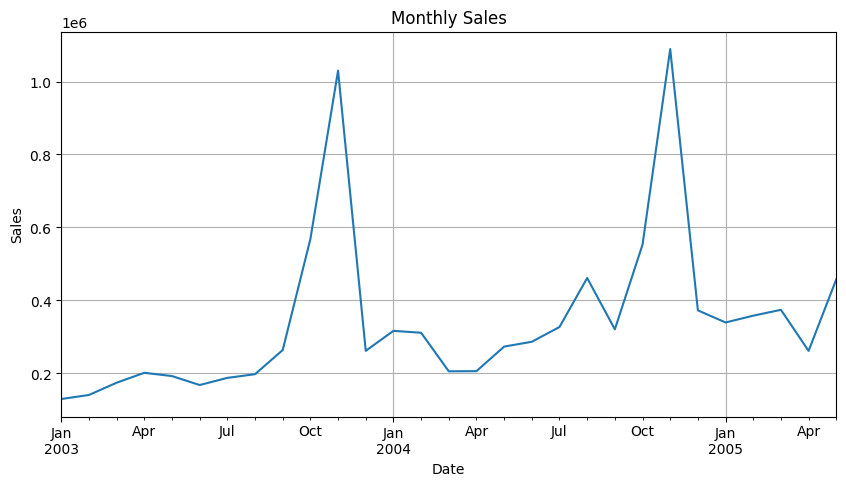

In [ ]:
#monthly sales trend
plt.figure(figsize=(10, 5))
monthly_sales.plot()
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)


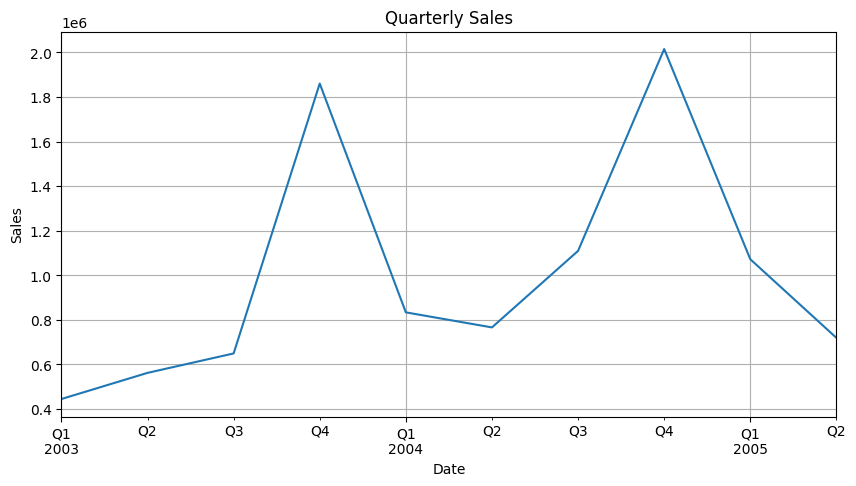

In [ ]:
#quarterly sales trend
plt.show()
plt.figure(figsize=(10, 5))
quarterly_sales.plot()
plt.title('Quarterly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [ ]:
#Download CSV file
df.to_csv('data.csv',index= 'false')
from google.colab import files
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>